In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import typing

In [21]:
def same(*args):
    for arg in args:
        assert args[0] == arg
    return args[0]

In [2]:
def least_squares(
    A: np.ndarray,
    b: np.ndarray,
):
    Ap = np.matmul(A.T, A)
    bp = np.matmul(A.T, b)
    return np.linalg.solve(Ap, bp)

# Probleme

## 2

In [18]:
x = np.array([
	-1.024940, -0.949898, -0.866114, -0.773392, -0.671372,
	-0.559524, -0.437067, -0.302909, -0.159493, -0.007464,
])
y = np.array([
	-0.389269, -0.322894, -0.265256, -0.216557, -0.177152,
	-0.147582, -0.128618, -0.121353, -0.127348, -0.148895,
])

# model elipsoidal
A = np.stack([
    y**2, x*y, x, y, np.ones(len(x)),
], 1)
b = x**2

coeff = least_squares(A, b)
a, b, c, d, e = coeff.tolist()
print(coeff)

err = np.sum(
    ((a*y**2 + b*x*y + c*x + d*y + np.ones(len(x))*e) - x**2)**2
)**1/2
print(err)

# model parabolic
A = np.stack([
    y, np.ones(len(x)),
], 1)
b = x**2

coeff = least_squares(A, b)
a, e = coeff.tolist()
print(coeff)

err = np.sum(
    ((a*y + np.ones(len(x))*e) - x**2)**2
)**1/2
print(err)

[-1.30255935 -0.71603211 -0.6793044  -3.37900324 -0.47822792]
6.032241059076361e-07
[-3.85489231 -0.35097823]
0.05894131044653583


Modelul eliptic este mai probabil, pentru ca are eroare mai mica.

## 3

In [19]:
A = np.array([
    [1, 1, 1],
    [1, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [0, 0, 1],
])
b = np.array([
    89,
    67,
    53,
    35,
    20,
])

x1, x2, x3 = least_squares(A, b)
print(x1, x2, x3)

35.125 32.5 20.625


## 4

$$
\begin{aligned}
y&=Ke^{\lambda t} \\
\log{y}&=\log{K}+\log{e}\lambda t \\
\end{aligned}
$$

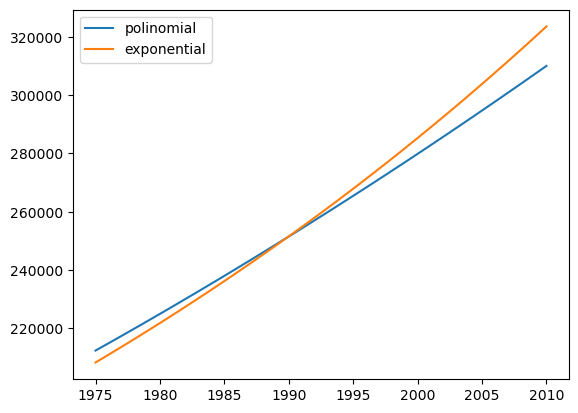

In [36]:
t = np.array([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010])
y = np.array([75_995, 91_972, 105_710, 123_200, 131_670, 150_700, 179_320, 203_210, 226_510, 249_630, 281_420, 308_790])
p = np.linspace(1975, 2010)
n = same(len(t), len(y))

# model polinomial
A = np.stack([
    t**0, t, t**2, t**3,
], 1)
b = y

c0, c1, c2, c3 = least_squares(A, b)
plt.plot(p, c0*p**0 + c1*p**1 + c2*p**2 + c3*p**3)

# model exponential
A = np.stack([
    t**0, t*np.log(np.e),
], 1)
b = np.log(y)

log_K, lambda_ = least_squares(A, b)
K = np.exp(log_K)
plt.plot(p, K*np.exp(lambda_*p))

plt.legend(["polinomial", "exponential"])